In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv('wine_data.csv',header = None,usecols=[0,1,2])
df.columns=['Class Lebel','Alcohol','Malic Acid']

In [89]:
df

,Class Lebel,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

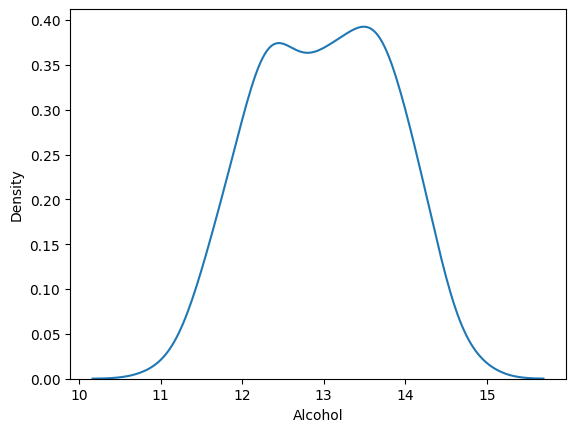

In [90]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

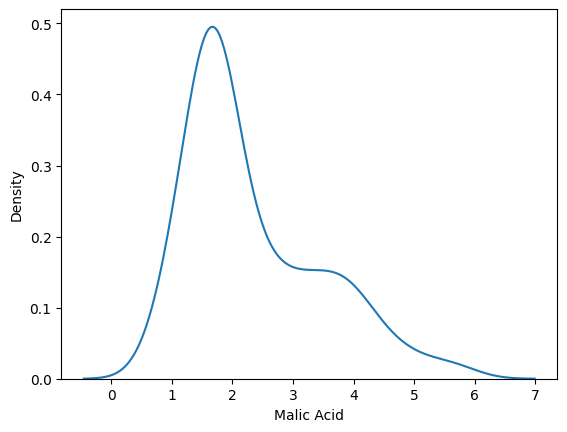

In [91]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

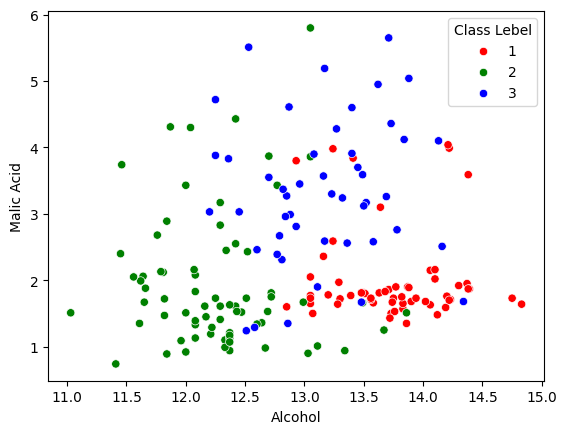

In [92]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(data = df,x = 'Alcohol',y ='Malic Acid',hue=df['Class Lebel'],palette=color_dict)

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Class Lebel',axis = 1),df['Class Lebel'],test_size = 0.3,random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [94]:
#Min max scaller
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [96]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [97]:
np.round(X_train_scaled.describe(),1)


,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


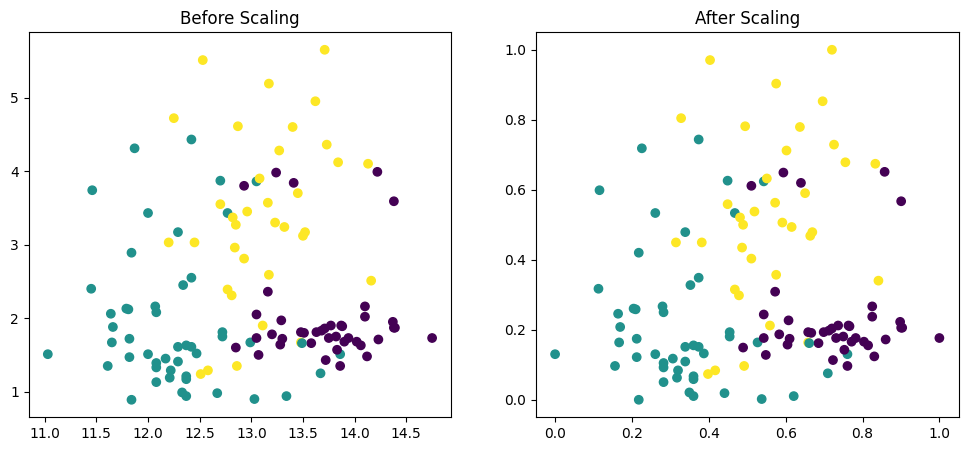

In [98]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c = Y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c = Y_train)
ax2.set_title('After Scaling')
plt.show()

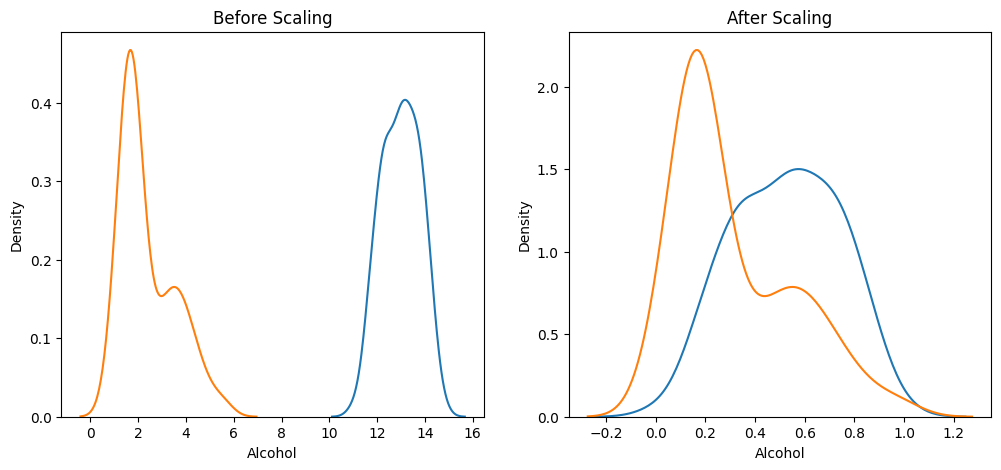

In [99]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

#before scalling probability density function
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,legend=True)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2,legend=True)

plt.show()

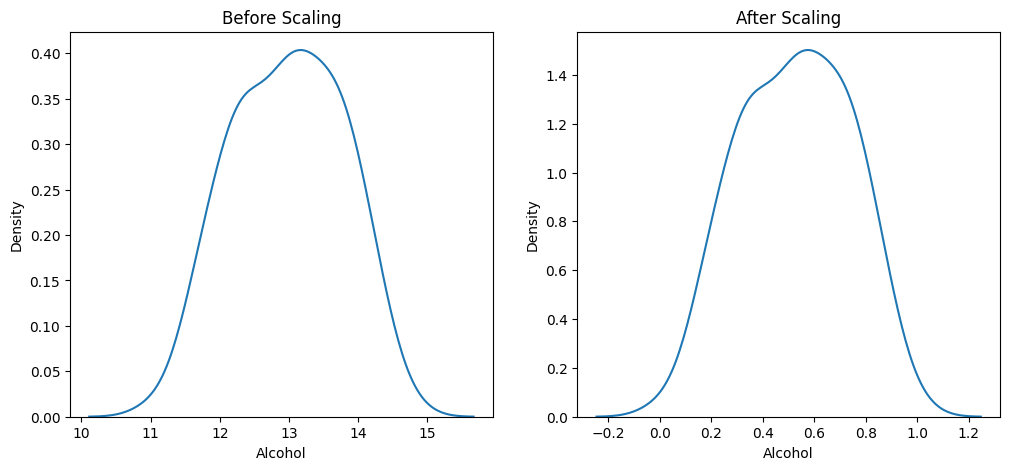

In [100]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

#before scalling probability density function
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
#sns.kdeplot(X_train['Malic Acid'],ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,legend=True)
#sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2,legend=True)

plt.show()

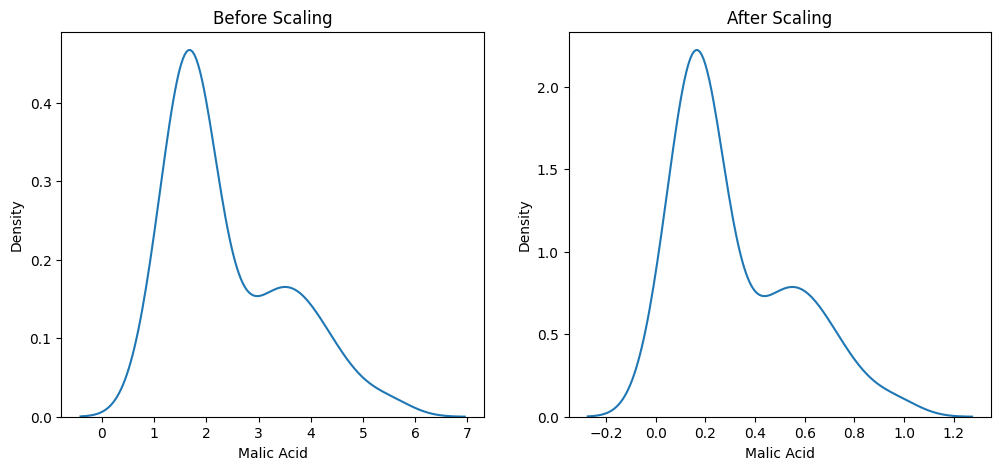

In [101]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

#before scalling probability density function
ax1.set_title('Before Scaling')
#sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)


ax2.set_title('After Scaling')
#sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,legend=True)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2,legend=True)

plt.show()

Mean Normalization

In [121]:
X_train_new_1 = X_train.copy()
X_test_new_1 = X_test.copy()


In [122]:
X_train_new_1['Alcohol'] = (X_train_new_1['Alcohol']- X_train_new_1['Alcohol'].mean())/(X_train_new_1['Alcohol'].max()-X_train_new_1['Alcohol'].min())
X_train_new_1['Malic Acid'] = (X_train_new_1['Malic Acid']- X_train_new_1['Malic Acid'].mean())/(X_train_new_1['Malic Acid'].max()-X_train_new_1['Malic Acid'].min())

In [123]:
X_train_new_1

,Alcohol,Malic Acid
22,0.195413,-0.110023
108,-0.205125,-0.229771
175,0.077133,0.398380
145,0.047563,0.249221
71,0.235735,-0.183552
...,...,...
103,-0.312652,-0.139435
67,-0.164802,-0.254981
117,-0.151361,-0.162544
47,0.246488,-0.147838


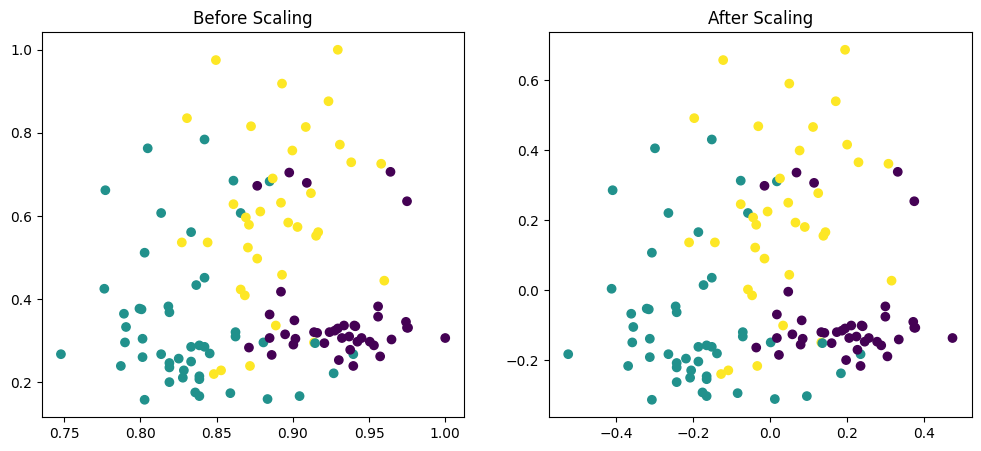

In [125]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c = Y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_new_1['Alcohol'],X_train_new_1['Malic Acid'],c = Y_train)
ax2.set_title('After Scaling')
plt.show()

Max Absolute Scale

In [129]:
#Mathematical Way

X_train_new_2 = X_train.copy()
X_test_new_2 = X_test.copy()
X_train_new_2

,Alcohol,Malic Acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [130]:
X_train_new_2['Alcohol'] = X_train_new_2['Alcohol']/np.absolute(X_train_new_2['Alcohol'].max())
X_train_new_2['Malic Acid'] = X_train_new_2['Malic Acid']/np.absolute(X_train_new_2['Malic Acid'].max())

In [131]:
X_train_new_2

,Alcohol,Malic Acid
22,0.929492,0.329204
108,0.828475,0.228319
175,0.899661,0.757522
145,0.892203,0.631858
71,0.939661,0.267257
...,...,...
103,0.801356,0.304425
67,0.838644,0.207080
117,0.842034,0.284956
47,0.942373,0.297345


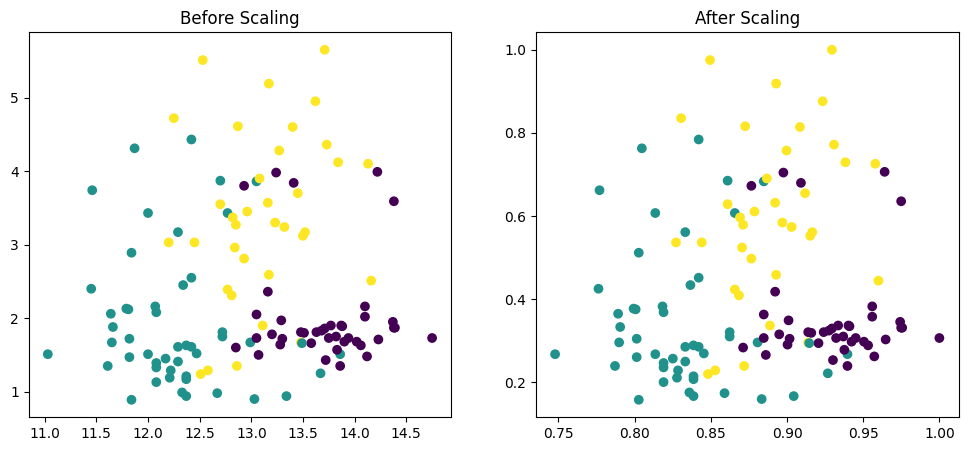

In [133]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c = Y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_new_2['Alcohol'],X_train_new_2['Malic Acid'],c = Y_train)
ax2.set_title('After Scaling')
plt.show()

In [134]:
#Standard Way to do this
from sklearn.preprocessing import MaxAbsScaler

In [136]:
scaler = MaxAbsScaler()

scaler.fit(X_train)

MaxAbsScaler()

In [138]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [142]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [143]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.9,0.4
std,0.1,0.2
min,0.7,0.2
25%,0.8,0.3
50%,0.9,0.3
75%,0.9,0.6
max,1.0,1.0


In [144]:
np.round(X_train_new_2.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.9,0.4
std,0.1,0.2
min,0.7,0.2
25%,0.8,0.3
50%,0.9,0.3
75%,0.9,0.6
max,1.0,1.0


#Robust Scaling

In [145]:
from sklearn.preprocessing import RobustScaler

In [146]:
scaler = RobustScaler()

In [147]:
scaler.fit(X_train)

RobustScaler()

In [148]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [150]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [151]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,-0.0,0.3
std,0.6,0.7
min,-1.6,-0.6
25%,-0.5,-0.2
50%,0.0,0.0
75%,0.5,0.8
max,1.3,2.3


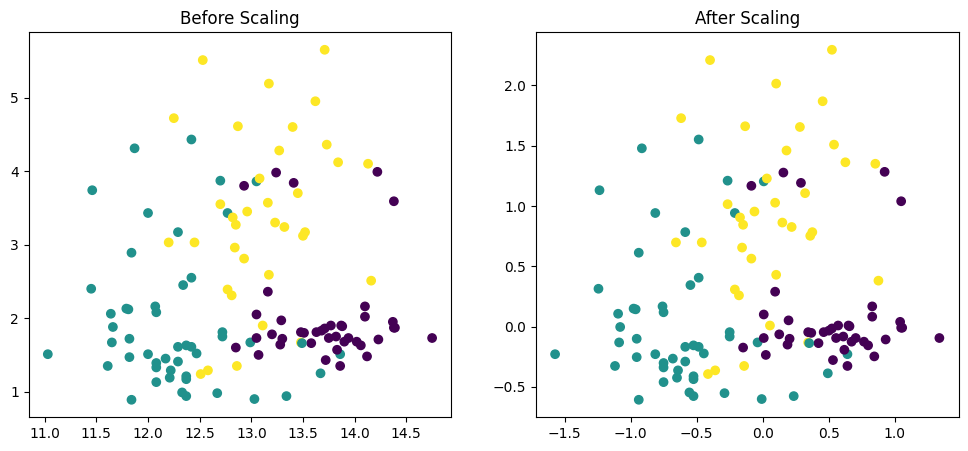

In [152]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c = Y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c = Y_train)
ax2.set_title('After Scaling')
plt.show()